In [1]:
# Clears all user-defined variables, functions, and imports without asking for confirmation.
%reset -f

In [12]:
import pandas as pd

In [2]:
# Imported Python files do not automatically reload after you modify them
# M1: Automatically Reload
%load_ext autoreload
%autoreload 2
# M2: Manual Reload
# import importlib
# import ksfdtw
# importlib.reload(ksfdtw)

# https://stackoverflow.com/questions/20309456/how-do-i-call-a-function-from-another-py-file
from ksfdtw import *

In [ ]:
#  Updated Example with Pruning Count
import numpy as np
from tslearn.datasets import UCR_UEA_datasets
from tslearn.metrics import dtw, lb_keogh
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Load dataset
ucr = UCR_UEA_datasets()
X_train, y_train, X_test, y_test = ucr.load_dataset("GunPoint")
X_train = X_train.squeeze()
X_test = X_test.squeeze()

# 1-NN with LB_Keogh pruning and stats
class LBKeogh1NN:
    def __init__(self, lb_radius=5):
        self.lb_radius = lb_radius
        self.total_dtw_calls = 0
        self.total_pruned = 0

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        preds = []
        for x in tqdm(X_test, desc="Classifying"):
            min_dtw = float('inf')
            best_label = None
            for xt, label in zip(self.X_train, self.y_train):
                # Prune using LB_Keogh
                lb = lb_keogh(x, xt, radius=self.lb_radius)
                if lb >= min_dtw:
                    self.total_pruned += 1
                    continue

                dist = dtw(x, xt)
                self.total_dtw_calls += 1
                if dist < min_dtw:
                    min_dtw = dist
                    best_label = label
            preds.append(best_label)
        return np.array(preds)

# Run
model = LBKeogh1NN(lb_radius=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Results
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(f"DTW calls made: {model.total_dtw_calls}")
print(f"Candidates pruned by LB_Keogh: {model.total_pruned}")
total_candidates = len(X_test) * len(X_train)
print(f"Pruning ratio: {model.total_pruned / total_candidates:.2%}")


Classifying: 100%|██████████| 150/150 [00:02<00:00, 51.79it/s] 

Accuracy: 0.9400
DTW calls made: 605
Candidates pruned by LB_Keogh: 6895
Pruning ratio: 91.93%


In [ ]:
# https://www.timeseriesclassification.com/description.php?Dataset=FreezerRegularTrain
# https://www.timeseriesclassification.com/description.php?Dataset=ECG5000
# https://www.timeseriesclassification.com/description.php?Dataset=Beef
# https://www.timeseriesclassification.com/description.php?Dataset=GunPointOldVersusYoung

In [ ]:
# https://pureportal.strath.ac.uk/en/datasets/refit-electrical-load-measurements-cleaned
# https://pure.strath.ac.uk/ws/portalfiles/portal/62090183/CLEAN_READ_ME_081116.txt
# House 1
# 0.Aggregate
# 1.Fridge, Hotpoint, RLA50P
# 2.Freezer(1),Beko, CF393APW
# 3.Freezer(2), Unknown, Unknown
# 4.Washer Dryer, Creda, T522VW
# 5.Washing Machine, Beko, WMC6140
# 6.Dishwasher, Bosch, Unknown
# 7.Computer, Lenovo, H520s
# 8.Television Site, Toshiba, 32BL502b
# 9.Electric Heater, GLEN, 2172
df = pd.read_csv('../data/CLEAN_House1.csv')


In [ ]:
df

,Time,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,Issues
0,2013-10-09 13:06:17,1381323977,523,74,0,69,0,0,0,0,0,1,0
1,2013-10-09 13:06:31,1381323991,526,75,0,69,0,0,0,0,0,1,0
2,2013-10-09 13:06:46,1381324006,540,74,0,68,0,0,0,0,0,1,0
3,2013-10-09 13:07:01,1381324021,532,74,0,68,0,0,0,0,0,1,0
4,2013-10-09 13:07:15,1381324035,540,74,0,69,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960003,2015-07-10 11:56:05,1436529365,187,0,45,0,0,0,0,0,0,1,0
6960004,2015-07-10 11:56:12,1436529372,185,0,45,0,0,0,0,0,0,1,0
6960005,2015-07-10 11:56:18,1436529378,181,0,45,0,0,0,0,0,0,1,0
6960006,2015-07-10 11:56:25,1436529385,186,0,45,0,0,0,0,0,0,1,0


In [ ]:
6960008/640

10875.0125

In [ ]:
10875/(24*60)

7.552083333333333

In [ ]:
downsampled_data = df['Appliance3'][::8]  # Use slicing with step n

In [ ]:
downsampled_data = downsampled_data.reset_index(drop=True)

In [ ]:
downsampled_data.shape

(870001,)

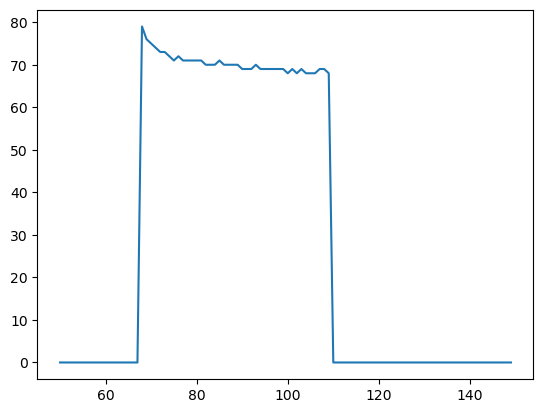

In [ ]:
plt.plot(downsampled_data[50:150])

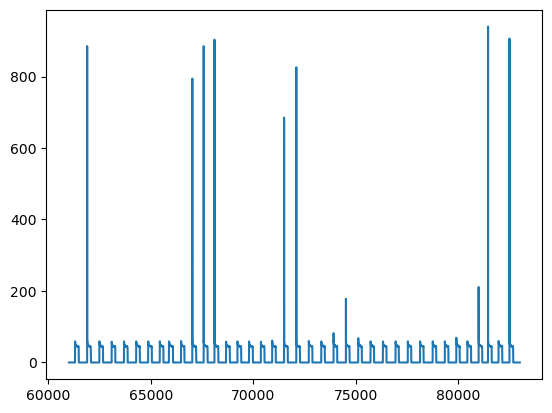

In [ ]:
plt.plot(df['Appliance2'][61000:83000], label='Appliance2')

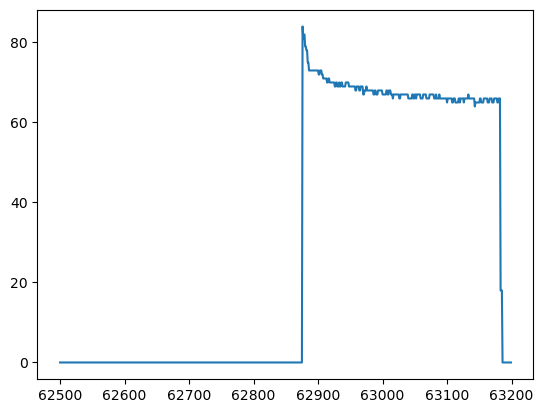

In [ ]:
plt.plot(df['Appliance3'][62500:63200], label='Appliance3')